In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [3]:
#define sentences
sentences = ["Programming is a good habit",
            "This is bad code you must improve it",
            "This is a perfect idea",
            "Your code was clean and neat",
            "You are excellent programmer",
            "You have performed badly in the examinations",
            "You could have made it better",
            "Good work! Keep it up.",
            "Poor performance",
            "Improve yourself"]
#define remarks
remarks = array([1,0,1,1,1,0,0,1,0,0])

## Tokenization and one_hot_encoding

Our approach involves breaking down each sentence into individual words and representing each sequence as a vector using one-hot encoding.

In [4]:
# integer encode the sentences
vocabulary_size = 50
encoded_sequence = [ one_hot(s, vocabulary_size) for s in sentences ]
print( encoded_sequence )

[[13, 45, 24, 38, 49], [5, 45, 32, 41, 36, 43, 30, 20], [5, 45, 24, 3, 44], [43, 41, 31, 15, 49, 16], [36, 35, 48, 49], [36, 4, 17, 19, 39, 33, 21], [36, 3, 4, 45, 20, 2], [38, 24, 20, 20, 4], [46, 19], [30, 20]]



The function called "one_hot" will require a sentence and a vocabulary_size as input parameters. The code shown above will use the "one_hot" function imported from Keras to convert all the sentences into an encoded form consisting of integers.

After performing the one_hot function on the sentences, the above result is the output.

But we can see that all the one_hot_encoded vectors are not of equal length, so to overcome this problem, we pad every sentence using the pad_sequences function. 

## Padding

The belowe code will pad every sequence. Following is the output after applying the pad_sqeuences function on the one_hot_encoded vectors. We can see that every sequence has a length of ten numbers. 

Number of zeros added to each vector = max_length - length of one_hot_encoded vecto

In [5]:
# pad documents to a max length of 10 words
max_length = 10
padded_sequence = pad_sequences( encoded_sequence, maxlen = max_length, padding='pre' )
print( padded_sequence )

[[ 0  0  0  0  0 13 45 24 38 49]
 [ 0  0  5 45 32 41 36 43 30 20]
 [ 0  0  0  0  0  5 45 24  3 44]
 [ 0  0  0  0 43 41 31 15 49 16]
 [ 0  0  0  0  0  0 36 35 48 49]
 [ 0  0  0 36  4 17 19 39 33 21]
 [ 0  0  0  0 36  3  4 45 20  2]
 [ 0  0  0  0  0 38 24 20 20  4]
 [ 0  0  0  0  0  0  0  0 46 19]
 [ 0  0  0  0  0  0  0  0 30 20]]


Till now we have created proper input data that we can feed to the embedding layer.

## Embedding layers


In the code below we are creating embedding layers.


input_dim: It is the vocabulary size of the input data. Suppose your data is encoded using integers from 0 to 500, then the vocabulary size will be 501 words.<br><br>
output_dim: It defines the length of the resulting vector for each word. The size of the vector may vary from 1 to any large integer.<br><br>
input_length: input_length is the total number of words in the input sequence. If all the sentences in your dataset contain 50 words, the input_length for that embedding layer will be 50.

In [6]:
# define the model
model = Sequential()
embedding_layer = Embedding( vocabulary_size, 10, input_length = max_length )
model.add( embedding_layer )
model.add( Flatten() )
model.add( Dense(1, activation='sigmoid') )
# compile the model
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
# summarize the model
print( model.summary() )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 10)            500       
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


### Flatten
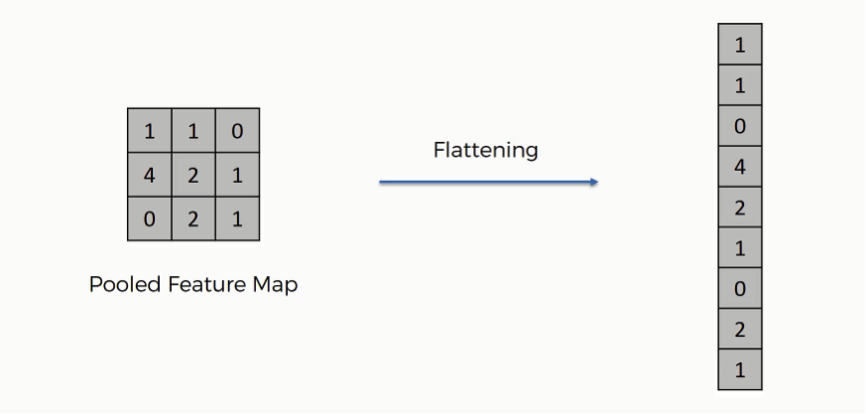

We are creating a sequential model. In the embedding layer, vocabulary_size is input_dim parameter, output_dim is set to 10, and input_length of the sequence is the length of the padded sequence (max_length), i.e., 10. After flattening it apply a dense layer using the sigmoid activation function. 

Compile the model using the adam optimizer and use the binary_crossentropy as a loss function. 

The summary of the model is displayed above.

## Train and evaluate the model

In [7]:
# fit the model 

#The padded_sequence and remarks are then passed through this embedding layer. 
#Further accuracy of the model is evaluated
model.fit( padded_sequence, remarks, epochs=50, verbose=0 )
# evaluate the model
loss, accuracy = model.evaluate( padded_sequence, remarks, verbose=0 )
print( 'Accuracy: %f' % (accuracy*100) )

2023-05-11 16:17:41.603937: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Accuracy: 100.000000


In [8]:
print( embedding_layer.get_weights()[0].shape )
print( embedding_layer.get_weights()[0][0] )

(50, 10)
[ 0.09388529  0.08305469  0.06187513 -0.03443019 -0.00112939  0.09255347
 -0.01517768  0.08657327  0.09617761  0.01216056]


This embedding matrix will be of 50 rows and ten columns, where each row is a vector representation of a single word, as shown in the output above.

In [11]:
print( embedding_layer.get_weights()[0] )

[[ 9.38852876e-02  8.30546916e-02  6.18751273e-02 -3.44301946e-02
  -1.12938881e-03  9.25534666e-02 -1.51776820e-02  8.65732655e-02
   9.61776078e-02  1.21605638e-02]
 [-3.85315418e-02  1.95661671e-02 -1.81525461e-02 -4.86598611e-02
   3.18855084e-02 -3.81488912e-02  1.06371865e-02 -2.00034976e-02
  -4.31242697e-02 -5.18710539e-03]
 [-6.98235333e-02  9.09015387e-02  5.30293621e-02 -3.22345607e-02
   6.27857074e-02  5.23870587e-02 -7.86176398e-02  7.51003101e-02
  -8.49833339e-02 -6.27578497e-02]
 [-2.32299194e-02  7.73078352e-02  7.74157941e-02  8.48370269e-02
  -5.11130644e-03  2.61939913e-02 -4.30462547e-02  1.45091340e-02
  -8.60781074e-02 -3.90743203e-02]
 [ 4.65109572e-02 -7.06498697e-02 -5.89971663e-04 -6.28100559e-02
   5.29035777e-02 -6.27889261e-02  3.63853760e-02 -2.50264890e-02
   4.03715856e-02  1.63600612e-02]
 [ 9.67882872e-02  2.48405710e-02  1.04447510e-02 -5.73330484e-02
   9.72675085e-02 -8.17217454e-02  6.56082155e-03 -3.78810540e-02
  -1.92806090e-03  8.94640014e-03